In [16]:
import pandas as pd
import requests
pd.set_option('display.max_columns', None) #see all columns in wide dataframe
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [17]:
#I found this dataset on Kaggle, so I'm beginning by reading it in through pandas

df = pd.read_csv('/Users/tevinjohnson/Downloads/car_prices.csv')

df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [18]:
#I'm already noticing some things in the data that need updating  
#First, I am renaming Columns
df.columns = ['Year', 'Make', 'Model', 'Trim', 'Body', 'Transmission', 'Vin', 'State', 'Condition', 'Odometer', 'Color', 'Interior', 'Seller', 'MMR', 'Selling Price', 'Sale Date']

In [19]:
#Using the describe function, we can look for any outliers
#The odometer column seems to have some, I will explore this more.
df.describe()

,Year,Condition,Odometer,MMR,Selling Price
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [20]:
#I'm seeing 999,999 for odometer which doesn't seem correct
#American cars will never hit anything near 999,999, so I'll assume this is a key error
#I will be pulling all of them and dropping these rows

df_high_odometer = df[df['Odometer'] == 999999]
df_high_odometer.head(20)

df_clean = df[df['Odometer'] != 999999]

df_clean.head(10)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [21]:
#Next, I will be checking for any null values in the columns

print(df_clean.isna().sum())

Year                 0
Make             10298
Model            10396
Trim             10647
Body             13190
Transmission     65346
Vin                  4
State                0
Condition        11819
Odometer            94
Color              748
Interior           748
Seller               0
MMR                 38
Selling Price       12
Sale Date           12
dtype: int64


In [22]:
#There are some NaN values so I am locating and dropping them

df_cleaned = df_clean.dropna()

df_cleaned.head(10)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [23]:
# Now the data is free of null values

df_cleaned.isnull().sum()

Year             0
Make             0
Model            0
Trim             0
Body             0
Transmission     0
Vin              0
State            0
Condition        0
Odometer         0
Color            0
Interior         0
Seller           0
MMR              0
Selling Price    0
Sale Date        0
dtype: int64

In [24]:
#I'm noticing some lowercased entries, I'll be updating those
columns_to_capitalize = ['Transmission', 'Color', 'Interior']


#Here I am iterating through the columns I want to capitalize with a loop
for col in columns_to_capitalize:
    df_cleaned[col] = df_cleaned[col].str.capitalize()
    
#Changing State to uppercase
df_cleaned['State'] = df_cleaned['State'].str.upper()

#Changing the Title names to uppercase
df_cleaned['Seller'] = df_cleaned['Seller'].str.title()

<ipython-input-24-33531d33881c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].str.capitalize()
<ipython-input-24-33531d33881c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['State'] = df_cleaned['State'].str.upper()
<ipython-input-24-33531d33881c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [25]:
df_cleaned.head(15)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,Automatic,5xyktca69fg566472,CA,5.0,16639.0,White,Black,Kia Motors America Inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,Automatic,5xyktca69fg561319,CA,5.0,9393.0,White,Beige,Kia Motors America Inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,Automatic,wba3c1c51ek116351,CA,45.0,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,CA,41.0,14282.0,White,Black,Volvo Na Rep/World Omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,CA,43.0,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,Automatic,1n4al3ap1fn326013,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,Automatic,wbsfv9c51ed593089,CA,34.0,14943.0,Black,Black,The Hertz Corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,Automatic,1g1pc5sb2e7128460,CA,2.0,28617.0,Black,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,Automatic,wauffafl3en030343,CA,42.0,9557.0,White,Black,Audi Mission Viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,Automatic,2g1fb3d37e9218789,CA,3.0,4809.0,Red,Black,D/M Auto Sales Inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [26]:

#I will extract the timestamp and convert to a date
df_cleaned['Sale Date'] = pd.to_datetime(df_cleaned['Sale Date'], errors='coerce', utc=True)

df_cleaned['Date'] = df_cleaned['Sale Date'].dt.date

df_cleaned.head(10)

<ipython-input-26-abb3a4b931c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sale Date'] = pd.to_datetime(df_cleaned['Sale Date'], errors='coerce', utc=True)
<ipython-input-26-abb3a4b931c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = df_cleaned['Sale Date'].dt.date


,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date,Date
0,2015,Kia,Sorento,LX,SUV,Automatic,5xyktca69fg566472,CA,5.0,16639.0,White,Black,Kia Motors America Inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014-12-16
1,2015,Kia,Sorento,LX,SUV,Automatic,5xyktca69fg561319,CA,5.0,9393.0,White,Beige,Kia Motors America Inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,Automatic,wba3c1c51ek116351,CA,45.0,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015-01-14
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,CA,41.0,14282.0,White,Black,Volvo Na Rep/World Omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015-01-28
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,CA,43.0,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014-12-18
5,2015,Nissan,Altima,2.5 S,Sedan,Automatic,1n4al3ap1fn326013,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350.0,10900.0,2014-12-30 04:00:00+00:00,2014-12-30
6,2014,BMW,M5,Base,Sedan,Automatic,wbsfv9c51ed593089,CA,34.0,14943.0,Black,Black,The Hertz Corporation,69000.0,65000.0,2014-12-17 04:30:00+00:00,2014-12-17
7,2014,Chevrolet,Cruze,1LT,Sedan,Automatic,1g1pc5sb2e7128460,CA,2.0,28617.0,Black,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,11900.0,9800.0,2014-12-16 05:00:00+00:00,2014-12-16
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,Automatic,wauffafl3en030343,CA,42.0,9557.0,White,Black,Audi Mission Viejo,32100.0,32250.0,2014-12-18 04:00:00+00:00,2014-12-18
9,2014,Chevrolet,Camaro,LT,Convertible,Automatic,2g1fb3d37e9218789,CA,3.0,4809.0,Red,Black,D/M Auto Sales Inc,26300.0,17500.0,2015-01-19 20:00:00+00:00,2015-01-19


In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472265 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Year           472265 non-null  int64              
 1   Make           472265 non-null  object             
 2   Model          472265 non-null  object             
 3   Trim           472265 non-null  object             
 4   Body           472265 non-null  object             
 5   Transmission   472265 non-null  object             
 6   Vin            472265 non-null  object             
 7   State          472265 non-null  object             
 8   Condition      472265 non-null  float64            
 9   Odometer       472265 non-null  float64            
 10  Color          472265 non-null  object             
 11  Interior       472265 non-null  object             
 12  Seller         472265 non-null  object             
 13  MMR            472265 non-nul

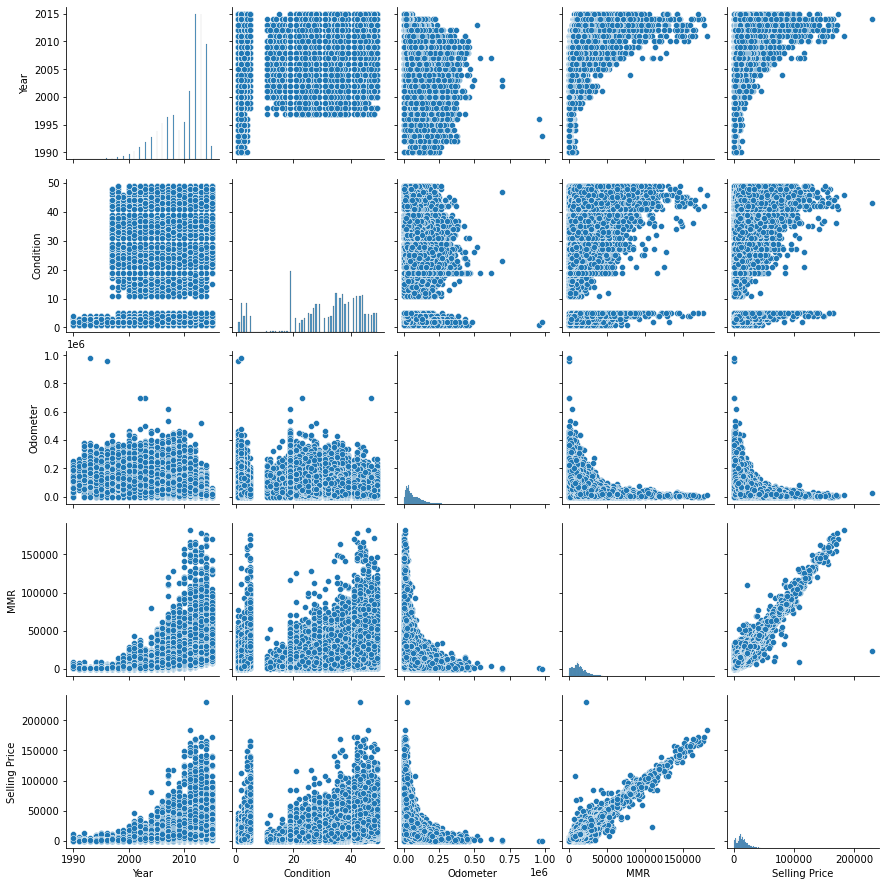

In [28]:
# Here I wanted a scatter matrix of the different integer columns. 

sns.pairplot(df_cleaned, kind="scatter")
plt.show()

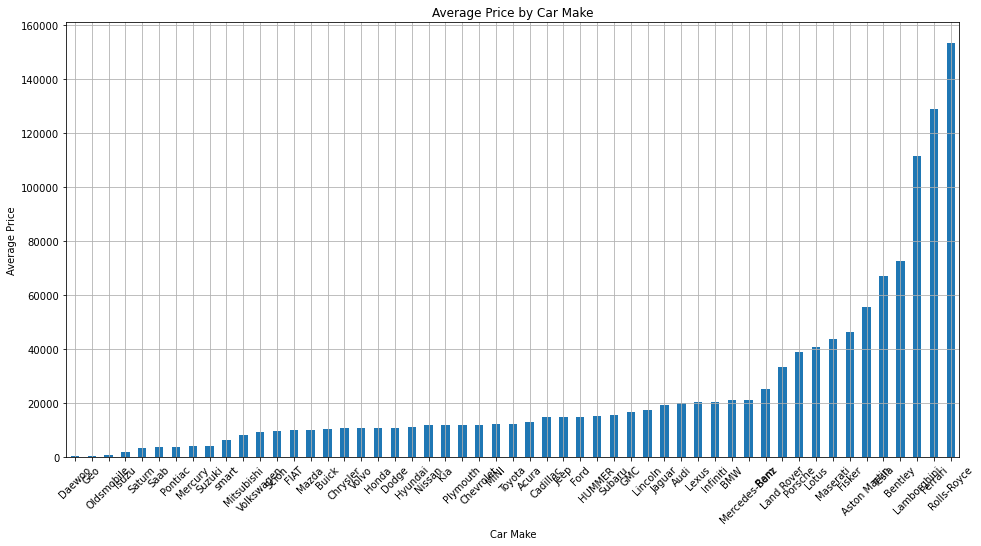

In [29]:
# Group by car make and calculate average price
price_comparison = df_cleaned.groupby('Make')['Selling Price'].mean().sort_values()

# Plot the price comparison
price_comparison.plot(kind='bar', figsize=(16, 8))
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Group Odometer and calculate average price
price_comparison = df_cleaned.groupby('Odometer')['Selling Price'].mean().sort_values()

# Plot the price comparison
price_comparison.plot(kind='bar', figsize=(16, 8))
plt.title('Average Price by Odometer')
plt.xlabel('Odometer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

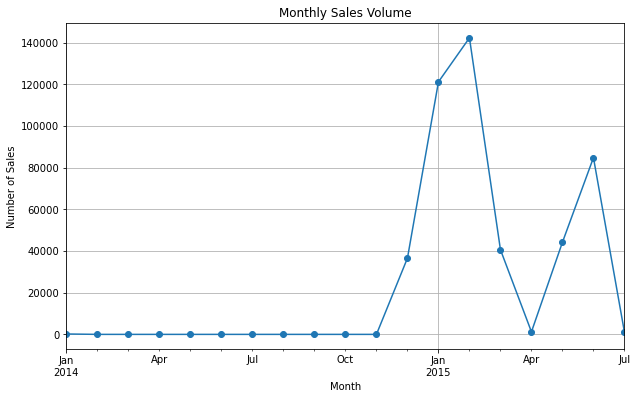

In [97]:
# Count number of transactions per month
monthly_sales = df_cleaned.resample('M', on='Sale Date').size()

# Plot the monthly sales volume
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()


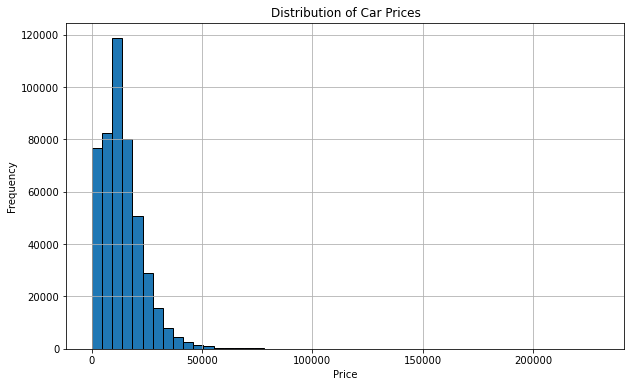

In [98]:
# Histogram of car prices
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Selling Price'], bins=50, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Make', 'Model', 'Trim', 'Body', 'Transmission', 'State', 'Condition', 'Color', 'Interior'])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


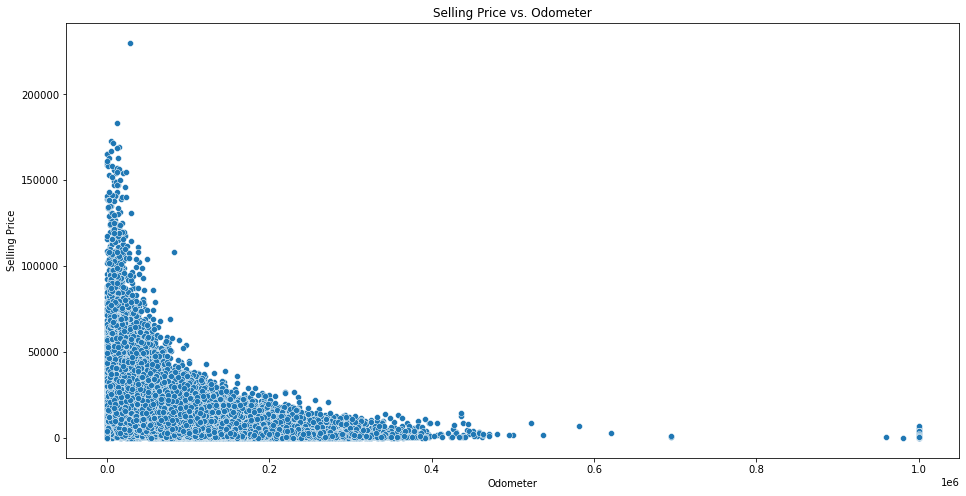

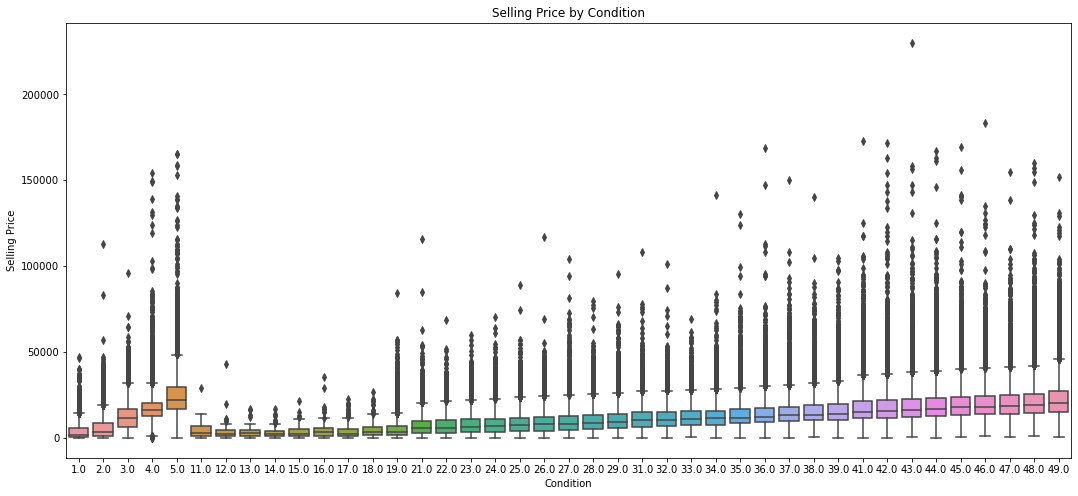

In [99]:
import seaborn as sns

# Plot Selling Price vs. Odometer
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Odometer', y='Selling Price', data=df)
plt.title('Selling Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

# Boxplot of Selling Price by Condition
plt.figure(figsize=(18, 8))
sns.boxplot(x='Condition', y='Selling Price', data=df)
plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()


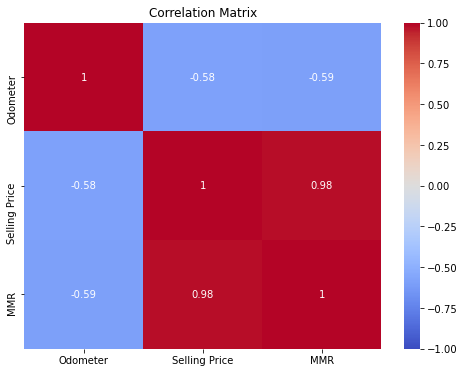

In [100]:
# Compute correlation matrix
corr = df[['Odometer', 'Selling Price', 'MMR']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


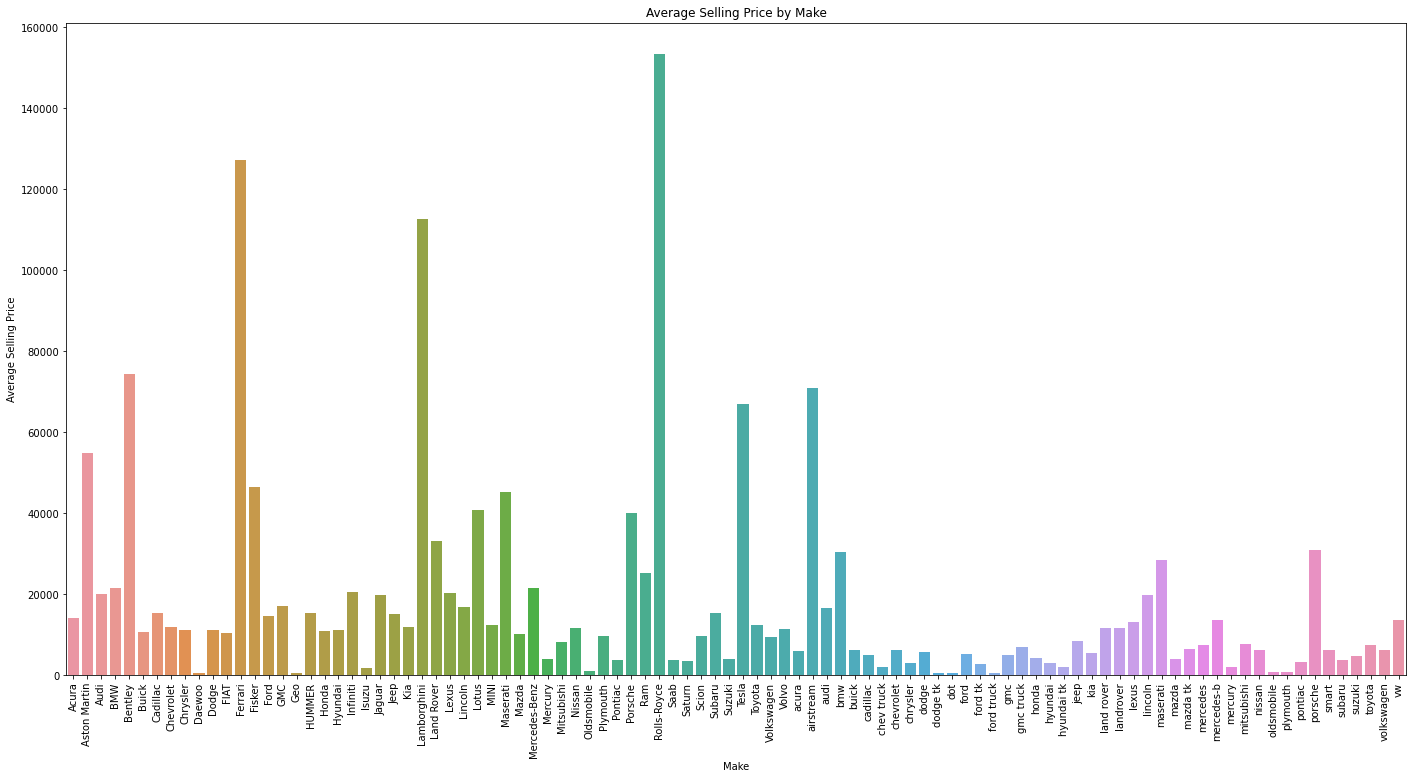

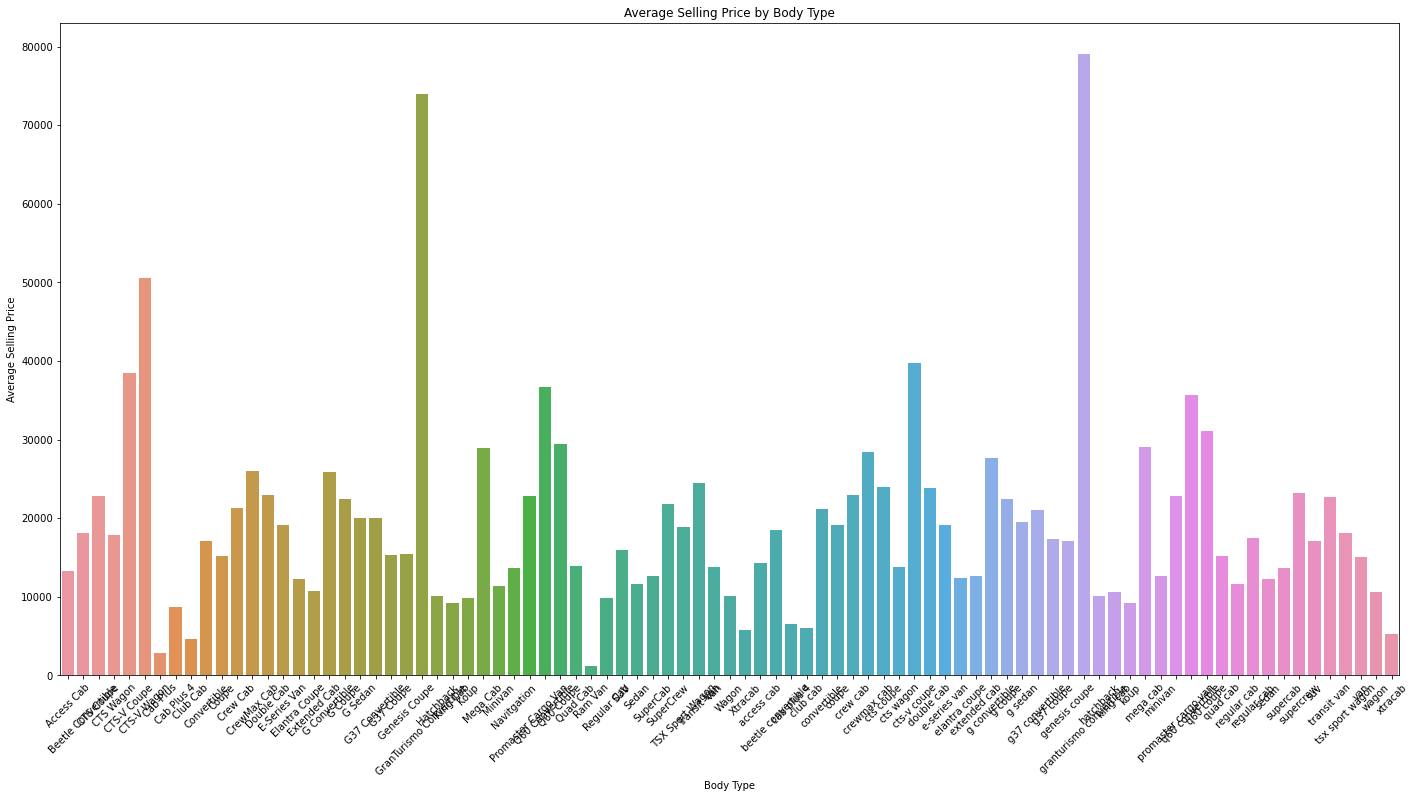

In [101]:
# Average Selling Price by Make
plt.figure(figsize=(24, 12))
sns.barplot(x='Make', y='Selling Price', data=df.groupby('Make').agg({'Selling Price': 'mean'}).reset_index())
plt.title('Average Selling Price by Make')
plt.xlabel('Make')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()

# Average Selling Price by Body Type
plt.figure(figsize=(24, 12))
sns.barplot(x='Body', y='Selling Price', data=df.groupby('Body').agg({'Selling Price': 'mean'}).reset_index())
plt.title('Average Selling Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()


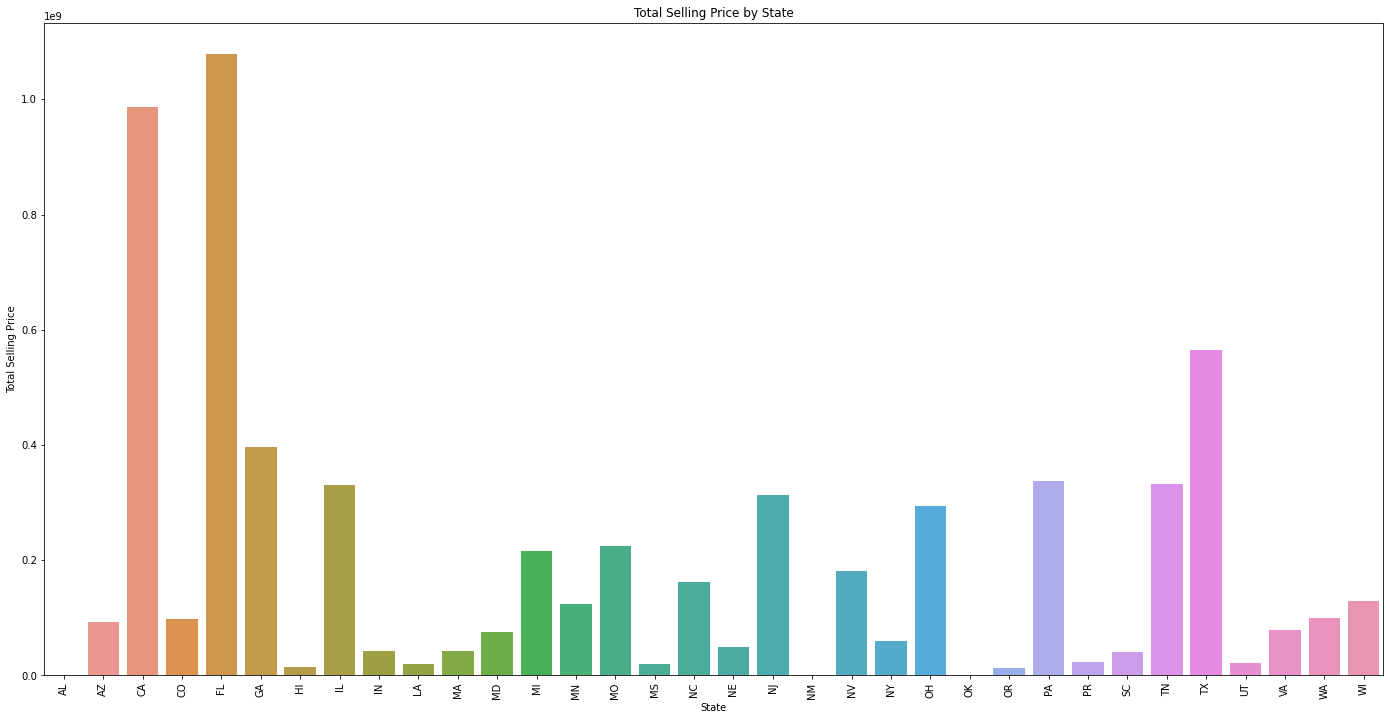

In [102]:
# Total selling price by State
state_sales = df_cleaned.groupby('State').agg({'Selling Price': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(24, 12))
sns.barplot(x='State', y='Selling Price', data=state_sales)
plt.title('Total Selling Price by State')
plt.xlabel('State')
plt.ylabel('Total Selling Price')
plt.xticks(rotation=90)
plt.show()


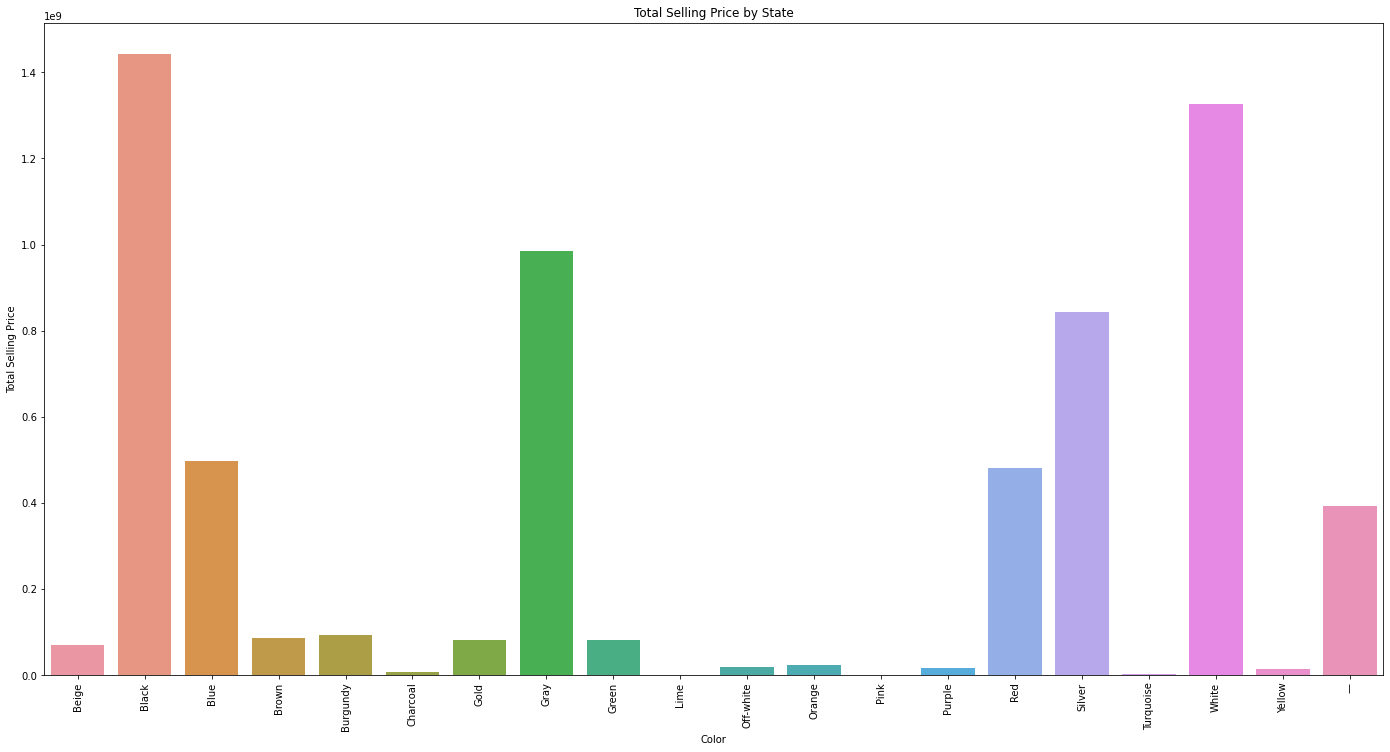

In [106]:
# Total selling price by State
state_sales = df_cleaned.groupby('Color').agg({'Selling Price': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(24, 12))
sns.barplot(x='Color', y='Selling Price', data=state_sales)
plt.title('Total Selling Price by State')
plt.xlabel('Color')
plt.ylabel('Total Selling Price')
plt.xticks(rotation=90)
plt.show()

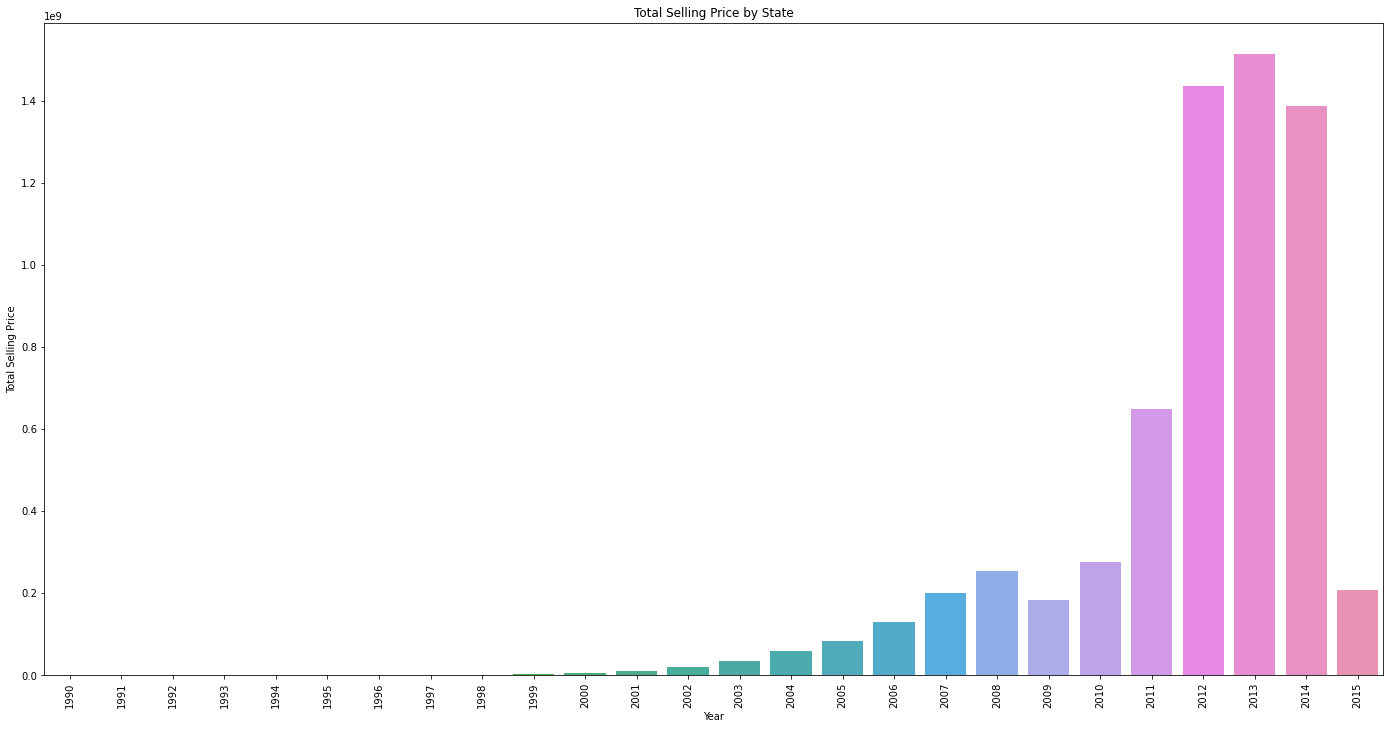

In [107]:
# Total selling price by State
state_sales = df_cleaned.groupby('Year').agg({'Selling Price': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(24, 12))
sns.barplot(x='Year', y='Selling Price', data=state_sales)
plt.title('Total Selling Price by State')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Total selling price by Color
state_sales = df_cleaned.groupby('Color').agg({'Selling Price': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(24, 12))
sns.barplot(x='Color', y='Selling Price', data=state_sales)
plt.title('Total Selling Price by State')
plt.xlabel('Color')
plt.ylabel('Total Selling Price')
plt.xticks(rotation=90)
plt.show()